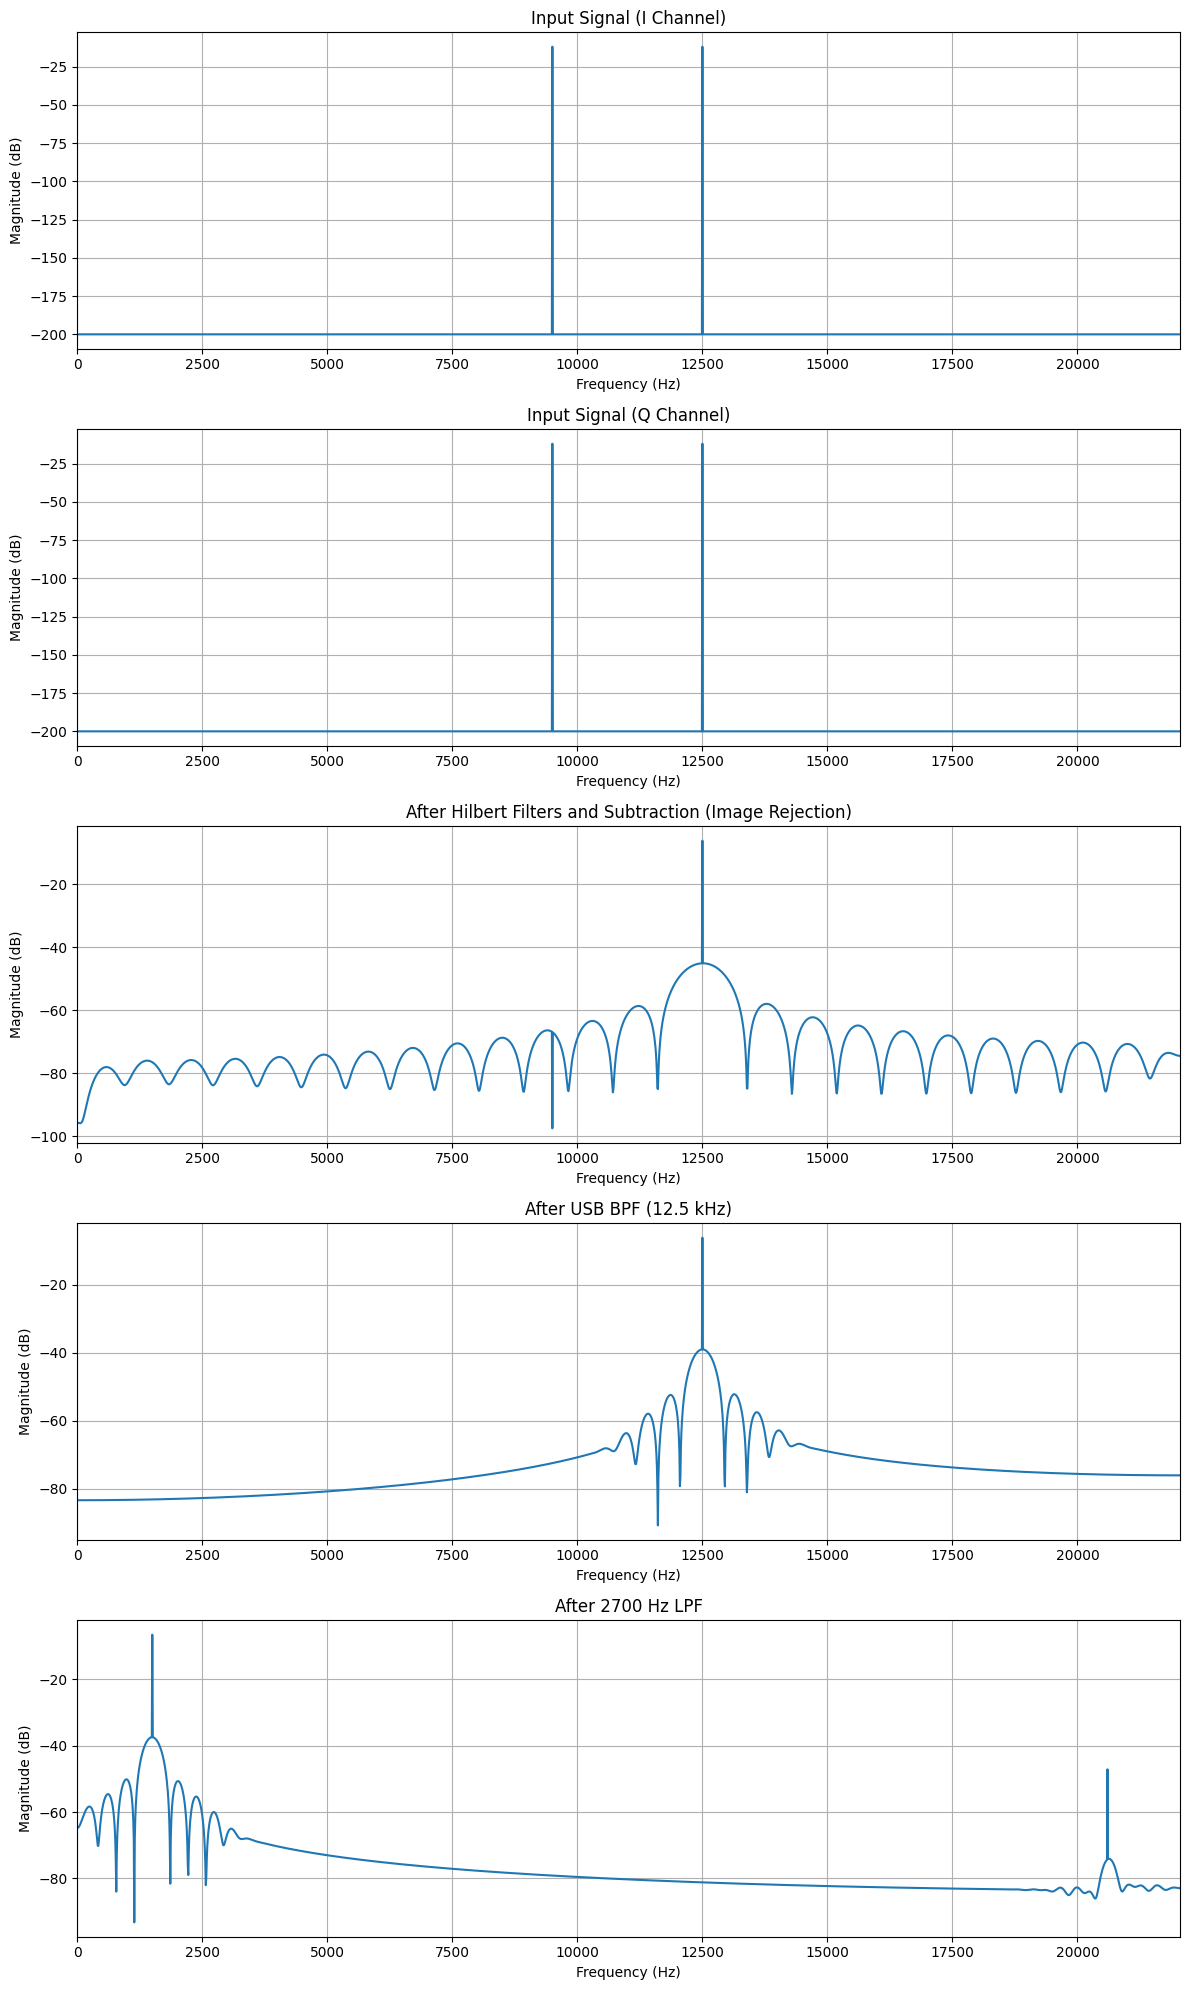

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, hilbert

# Sampling frequency
fs = 44100  # 44.1 kHz

# Hilbert filter coefficients for +45 degrees
coeffs_hilbert_plus_45 = [
    428.8698225779810E-18, 0.000866962256721964, 669.4578973884190E-18, 0.000723768779644489,
    625.1950335026000E-18, 0.000491948708636800, 932.9793308652210E-18, 0.000162753915054888,
    120.6877891916540E-18, -0.000267138492850143, 368.6242120344090E-18, -0.000794106419837781,
    -335.0841016622350E-18, -0.001406158205346857, 508.6725057380440E-18, -0.002081653046072215,
    525.4639122859110E-18, -0.002788189076768316, 1.997158538844780E-15, -0.003481638971364546,
    1.521786931189910E-15, -0.004105248229979659, 1.999269938576540E-15, -0.004588612972905914,
    1.642012534044480E-15, -0.004846199063150177, 2.321256832370990E-15, -0.004774806025839937,
    1.472463356633780E-15, -0.004248919032053459, 3.256022898511980E-15, -0.003112012423934955,
    2.885150851939090E-15, -0.001160058329106086, 4.963134919021790E-15, 0.001890534040148042,
    7.256657980479030E-15, 0.006468126105579311, 9.877273082232760E-15, 0.013288374303952424,
    9.998257606955500E-15, 0.023701141617936898, 13.04841388605350E-15, 0.040681358385972734,
    13.16584420291990E-15, 0.072465913204806887, 18.32157501742890E-15, 0.153651468095950122,
    45.04853770616490E-15, 0.872643185009882805, -124.9775599534200E-15, -0.320482045163527962,
    -21.83135851203050E-15, -0.147353662629853055, -13.25350771085950E-15, -0.098220446790738603,
    -9.869993202619540E-15, -0.073799181987711918, -4.594216166446000E-15, -0.058469211844324492,
    -3.304347777777260E-15, -0.047522100992294508, 104.5764716612020E-18, -0.039075967510059088,
    1.357742476364510E-15, -0.032247860767888339, 1.609834995034210E-15, -0.026578009579594275,
    302.9110018978720E-18, -0.021807474489618426, 1.269751717122650E-15, -0.017779413498920069,
    -245.5156751402480E-18, -0.014390646510711955, 431.8593097590070E-18, -0.011566204186358037,
    -20.73528334337070E-18, -0.009245418095997261, 493.9755466124440E-18, -0.007374279468676965,
    251.3569241845640E-18, -0.005901425606391064, 1.464223979968000E-15, -0.004776322329186264,
    697.1003972531060E-18, -0.003948802940774603, 814.1476939065410E-18, -0.003369432187206015,
    -316.1136311572910E-18, -0.002990334964793745, -90.52589606482270E-18, -0.002766233025766330,
    -696.4043762789310E-18, -0.002655502116741105, -32.56402058849020E-18, -0.002621113453607914,
    -86.94556986426840E-18, -0.002631365320034318, 85.18103595547740E-18, -0.002660346625915069
]

# Hilbert filter coefficients for -45 degrees
coeffs_hilbert_minus_45 = [
    -0.002660346625914681, -142.5615451960800E-18, -0.002631365320034742, 72.39460181599930E-18,
    -0.002621113453608740, 365.6625573314080E-18, -0.002655502116741606, -268.1406471145040E-18,
    -0.002766233025766440, 522.9276890266240E-18, -0.002990334964794087, -607.0059499422990E-18,
    -0.003369432187205082, -73.23460201465080E-18, -0.003948802940773903, -476.4056590717670E-18,
    -0.004776322329185343, -312.9479342217880E-18, -0.005901425606389074, -599.2210655172320E-18,
    -0.007374279468676095, -257.5055438396270E-18, -0.009245418095996334, -1.432636145077280E-15,
    -0.011566204186357842, 185.5776728505920E-18, -0.014390646510711451, -1.223169894210750E-15,
    -0.017779413498919743, -507.7725019792790E-18, -0.021807474489616407, -149.4865846637370E-18,
    -0.026578009579593605, -561.9513689420920E-18, -0.032247860767886542, -684.5163433330340E-18,
    -0.039075967510061899, 2.312619114749650E-15, -0.047522100992295140, 550.8313753159310E-18,
    -0.058469211844333152, 3.653449213341470E-15, -0.073799181987724130, 5.543566341328550E-15,
    -0.098220446790761515, 7.591005706981040E-15, -0.147353662629886223, 21.75090500727820E-15,
    -0.320482045163644980, 129.4663938604830E-15, 0.872643185009816635, -48.86088790795220E-15,
    0.153651468095996002, -23.34181949236510E-15, 0.072465913204831797, -12.73860359379920E-15,
    0.040681358385996375, -9.967403549770980E-15, 0.023701141617955505, -8.913611311437650E-15,
    0.013288374303971109, -5.120441418271150E-15, 0.006468126105590283, -6.713751021471820E-15,
    0.001890534040160306, -4.214988052861760E-15, -0.001160058329098612, -3.133467475213760E-15,
    -0.003112012423928077, -3.051927453298240E-15, -0.004248919032049460, -2.728321242007810E-15,
    -0.004774806025835775, -1.212682271632930E-15, -0.004846199063146594, -2.473499615604520E-15,
    -0.004588612972902101, -705.6223879923200E-18, -0.004105248229976594, -1.187392338537970E-15,
    -0.003481638971361474, -741.7226001046070E-18, -0.002788189076767050, -803.9975667293950E-18,
    -0.002081653046071019, -405.8558361122810E-18, -0.001406158205345744, -732.4771536664670E-18,
    -0.000794106419837717, 203.7380889287510E-18, -0.000267138492849360, -791.8767863321210E-18,
    0.000162753915055431, -99.16131906296190E-18, 0.000491948708637530, -608.0720937020530E-18,
    0.000723768779645844, -586.4325834209240E-18, 0.000866962256723557, -333.7536727527920E-18
]

# USB BPF filter coefficients (centered at 12.5 kHz)
coeffs_bpf_usb = [
    0.000077220197574123, -1.694364742523110E-6, -0.000247376363569229, 0.000172349071145931,
    0.000442532978562303, -0.000587921806885401, -0.000490796464995067, 0.001245366873040035,
    0.000130200340800485, -0.001862166817785674, 0.000703051894342210, 0.002007465586182165,
    -0.001685724919682768, -0.001407920138837247, 0.002116180748678689, 0.000372547212250720,
    -0.001360627435518710, 0.000104411160061938, -0.000488583862643263, 0.001171803660774852,
    0.002230271567546280, -0.004622738899125535, -0.001988597303309669, 0.009091087568736349,
    -0.001507388998028951, -0.012022955491491360, 0.007518507241432481, 0.010969367705405847,
    -0.012943254772900497, -0.005724754564656228, 0.013800759554407906, -0.000413209911619933,
    -0.008117888769062576, 0.001659860856017020, -0.001521029232922352, 0.006868472137034775,
    0.007858709633466776, -0.025100680515366711, -0.002212548908150258, 0.046023064611360000,
    -0.020182170398250168, -0.057755470091797719, 0.055819871330333046, 0.049337804826868066,
    -0.092667374657917745, -0.017292461343810531, 0.114978094867627500, -0.030993743432389236,
    -0.111032169995744168, 0.079554595102602668, 0.079554595102602668, -0.111032169995744168,
    -0.030993743432389236, 0.114978094867627500, -0.017292461343810531, -0.092667374657917745,
    0.049337804826868066, 0.055819871330333046, -0.057755470091797719, -0.020182170398250168,
    0.046023064611360000, -0.002212548908150258, -0.025100680515366711, 0.007858709633466776,
    0.006868472137034775, -0.001521029232922352, 0.001659860856017020, -0.008117888769062576,
    -0.000413209911619933, 0.013800759554407906, -0.005724754564656228, -0.012943254772900497,
    0.010969367705405847, 0.007518507241432481, -0.012022955491491360, -0.001507388998028951,
    0.009091087568736349, -0.001988597303309669, -0.004622738899125535, 0.002230271567546280,
    0.001171803660774852, -0.000488583862643263, 0.000104411160061938, -0.001360627435518710,
    0.000372547212250720, 0.002116180748678689, -0.001407920138837247, -0.001685724919682768,
    0.002007465586182165, 0.000703051894342210, -0.001862166817785674, 0.000130200340800485,
    0.001245366873040035, -0.000490796464995067, -0.000587921806885401, 0.000442532978562303,
    0.000172349071145931, -0.000247376363569229, -1.694364742523110E-6, 0.000077220197574123
]

# LPF filter coefficients (0-2700 Hz)
coeffs_lpf = np.array([
    -236, -589, -390, -574, -457, -334, -69, 236, 554, 797, 901, 806, 494, -12,
    -634, -1254, -1723, -1893, -1637, -885, 362, 2019, 3926, 5868, 7606, 8913,
    9615, 9615, 8913, 7606, 5868, 3926, 2019, 362, -885, -1637, -1893, -1723,
    -1254, -634, -12, 494, 806, 901, 797, 554, 236, -69, -334, -457, -574, -390,
    -589, -236
]) / 32768

# Generate simulated input with phase relations for USB (desired) and LSB (image)
t = np.arange(0, 0.1, 1/fs)
f_offset = 1500  # Audio offset for sidebands (1.5 kHz)
if_freq = 11000  # IF carrier
f_usb = if_freq + f_offset  # 12.5 kHz
f_lsb = if_freq - f_offset  # 9.5 kHz

# USB: Q lags I by 90°
i_usb = 0.5 * np.cos(2 * np.pi * f_usb * t)
q_usb = 0.5 * np.sin(2 * np.pi * f_usb * t)

# LSB image: Q leads I by 90° (phase flip)
i_lsb = 0.5 * np.cos(2 * np.pi * f_lsb * t)
q_lsb = -0.5 * np.sin(2 * np.pi * f_lsb * t)

input_signal_i = i_usb + i_lsb
input_signal_q = q_usb + q_lsb

# Signal path processing
# Step 1: Apply Hilbert +45° and -45° filters
hilbert_i = lfilter(coeffs_hilbert_plus_45, 1, input_signal_i)
hilbert_q = lfilter(coeffs_hilbert_minus_45, 1, input_signal_q)

# Step 2: Subtract for image rejection in USB mode
summed_signal = hilbert_i - hilbert_q

# Step 3: Apply USB BPF (centered at 12.5 kHz)
bpf_signal = lfilter(coeffs_bpf_usb, 1, summed_signal)

# Step 4: Mix with 11 kHz local oscillator
lo_signal = np.cos(2 * np.pi * if_freq * t)
mixed_signal = bpf_signal * lo_signal

# Step 5: Apply 2700 Hz LPF
output_signal = lfilter(coeffs_lpf, 1, mixed_signal)

# Function to compute and plot magnitude spectrum
def plot_spectrum(signal, title, subplot_idx, fs=44100):
    N = len(signal)
    freq = np.fft.rfftfreq(N, 1/fs)
    spectrum = np.abs(np.fft.rfft(signal)) / N
    spectrum_db = 20 * np.log10(spectrum + 1e-10)
    plt.subplot(5, 1, subplot_idx)
    plt.plot(freq, spectrum_db)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim(0, fs/2)

# Plotting
plt.figure(figsize=(12, 20))
plot_spectrum(input_signal_i, 'Input Signal (I Channel)', 1)
plot_spectrum(input_signal_q, 'Input Signal (Q Channel)', 2)
plot_spectrum(summed_signal, 'After Hilbert Filters and Subtraction (Image Rejection)', 3)
plot_spectrum(bpf_signal, 'After USB BPF (12.5 kHz)', 4)
plot_spectrum(output_signal, 'After 2700 Hz LPF', 5)
plt.tight_layout()
plt.show()
